Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [1]:
from math import sqrt
from typing import Any
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class Tsp:

    def __init__(self, num_cities: int, seed: Any = None) -> None:
        if seed is None:
            seed = num_cities
        self._num_cities = num_cities
        self._graph = nx.DiGraph()
        np.random.seed(seed)
        for c in range(num_cities):
            self._graph.add_node(c, pos=(np.random.random(), np.random.random()))

    def distance(self, n1, n2) -> int:
        pos1 = self._graph.nodes[n1]['pos']
        pos2 = self._graph.nodes[n2]['pos']
        return round(1_000_000 / self._num_cities * sqrt((pos1[0] - pos2[0])**2 +
                                                         (pos1[1] - pos2[1])**2))

    def evaluate_solution(self, solution: np.array) -> float:
        total_cost = 0
        tmp = solution.tolist() + [solution[0]]
        for n1, n2 in (tmp[i:i + 2] for i in range(len(tmp) - 1)):
            total_cost += self.distance(n1, n2)
        return total_cost

    def plot(self, path: np.array = None) -> None:
        if path is not None:
            self._graph.remove_edges_from(list(self._graph.edges))
            tmp = path.tolist() + [path[0]]
            for n1, n2 in (tmp[i:i + 2] for i in range(len(tmp) - 1)):
                self._graph.add_edge(n1, n2)
        plt.figure(figsize=(12, 5))
        nx.draw(self._graph,
                pos=nx.get_node_attributes(self._graph, 'pos'),
                with_labels=True,
                node_color='pink')
        if path is not None:
            plt.title(f"Current path: {self.evaluate_solution(path):,}")
        plt.show()

    @property
    def graph(self) -> nx.digraph:
        return self._graph

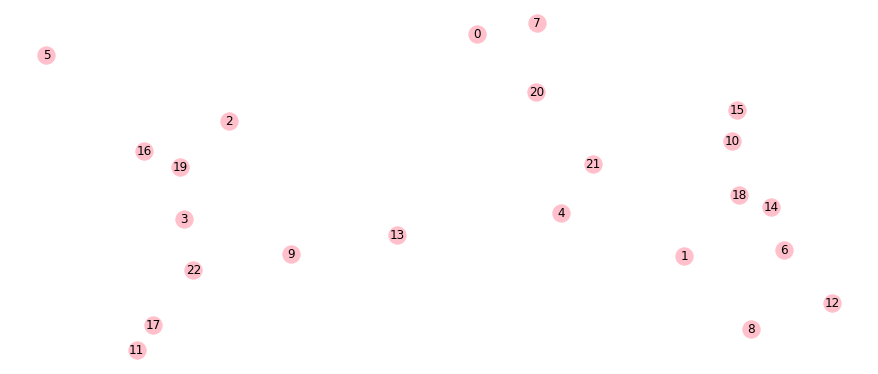

In [4]:
NUM_CITIES = 23

problem = Tsp(NUM_CITIES)
problem.plot()

In [5]:
def tweak(solution: np.array, *, pm: float = 1/NUM_CITIES) -> np.array:
    new_solution = solution.copy()
    p = None
    while p is None or p < pm:
        i1 = np.random.randint(0, NUM_CITIES)
        i2 = np.random.randint(0, NUM_CITIES)
        temp = new_solution[i1]
        new_solution[i1] = new_solution[i2]
        new_solution[i2] = temp
        p = np.random.random()
    return new_solution

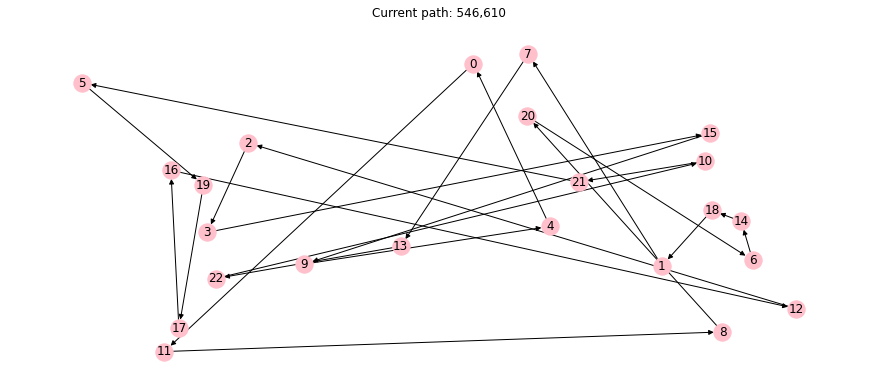

1000


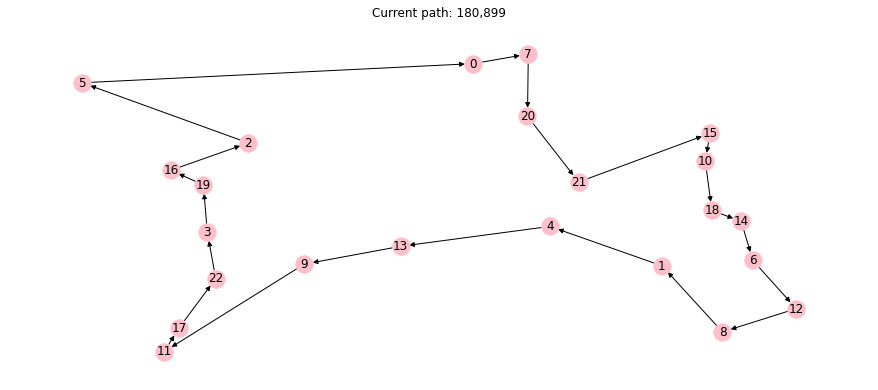

In [94]:
STEADY_STATE = 1000
DIM = 100

solutions = [np.array(range(NUM_CITIES))]*DIM
for i in range(len(solutions)):
    np.random.shuffle(solutions[i])

problem.plot(solutions[0])

population = 10
history = [(0, solution_cost)]
steady_state = 0
step = 0
max_score = float('inf')
while steady_state < STEADY_STATE:
    step += 1
    steady_state += 1
    solutions = sorted([tweak(solution, pm=i/len(solutions) + .1 if i/len(solutions) + .1 < 0.8 else 0.8) for i, solution in enumerate(solutions)], key=lambda x: problem.evaluate_solution(x))
    if max_score > problem.evaluate_solution(solutions[0]):
        max_score = problem.evaluate_solution(solutions[0])
        final = solutions[0].copy()
        steady_state = 0
    else:
        steady_state += 1
    solutions = solutions[:-int(DIM/2+1)]
    for i in range(len(solutions)):
        solutions.append(solutions[i].copy())
    solutions.append(final.copy())
    solutions.append(final.copy())
        
print(steady_state)
problem.plot(final)

In [75]:
len(solutions)

590530

In [86]:
len(solutions)

100